In [1]:
# Librerías para manipulación de datos
import pandas as pd
import numpy as np

# Librerías de machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestRegressor

# Librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("C:/Users/user/Desktop/Machine Learning/Precios_de_medicamentos_de_patente_2005_2016.csv", encoding='latin1')

In [3]:
dataset.head()

,Empresa,Producto,Presentacion,Principio_activo,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,"Abbott Laboratories de Mxico, S.A. de C.V.",BLOPRESS,Caja con 14 tabletas de16 mg.,Candesartan Cilexetilo,357.975,376.716667,389.575,410.325000,413.700000,434.4,457.9,457.9,480.8,NaN,NaN,NaN
1,"Abbott Laboratories de Mxico, S.A. de C.V.",BLOPRESS,Caja con 28 tabletas de 16 mg.,Candesartan Cilexetilo,640.400,683.475000,706.800,744.475000,764.350000,803.9,828.0,828.0,869.4,NaN,NaN,NaN
2,"Abbott Laboratories de Mxico, S.A. de C.V.",BLOPRESS,Caja con 14 tabletas de 8 mg.,Candesartan Cilexetilo,269.500,270.850000,284.025,299.141667,309.850000,326.1,343.7,343.7,343.7,NaN,NaN,NaN
3,"Abbott Laboratories de Mxico, S.A. de C.V.",BLOPRESS,Caja con 28 tabletas de 8 mg.,Candesartan Cilexetilo,476.675,497.425000,521.650,549.458333,579.391667,610.8,623.0,623.0,666.6,NaN,NaN,NaN
4,"Abbott Laboratories de Mxico, S.A. de C.V.",BLOPRESS PLUS,Caja con 14 tabletas de16 mg./12.5 mg.,Candesartan Cilexetilo/Hidroclorotiazida,306.500,327.633333,343.575,361.900000,374.891667,394.6,415.9,415.9,436.7,NaN,NaN,NaN


In [4]:
# Ver las columnas principales (nombres de las columnas)
print(dataset.columns)

Index(['Empresa', 'Producto', 'Presentacion ', 'Principio_activo', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016'],
      dtype='object')


In [5]:
columns_to_plot = ['Empresa', 'Producto', 'Presentacion ', 'Principio_activo', '2005',
                   '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
                   '2015', '2016']

In [6]:
# Crear una copia del dataset original
dataset_copy = dataset.copy()

In [7]:
# Reemplazar los valores faltantes (NaN) en las columnas numéricas con la media de cada columna
columns_years = ['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']

for column in columns_years:
    dataset_copy[column] = dataset_copy[column].fillna(dataset_copy[column].mean())

In [8]:
# Guardar el dataset modificado en un nuevo archivo CSV
dataset_copy.to_csv("C:/Users/user/Desktop/Machine Learning/Precios_de_medicamentos_de_patente_2005_2016_modificado.csv", index=False, encoding='latin1')

print("Archivo modificado y guardado exitosamente.")

Archivo modificado y guardado exitosamente.


In [9]:
(dataset_copy.head())

,Empresa,Producto,Presentacion,Principio_activo,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,"Abbott Laboratories de Mxico, S.A. de C.V.",BLOPRESS,Caja con 14 tabletas de16 mg.,Candesartan Cilexetilo,357.975,376.716667,389.575,410.325000,413.700000,434.4,457.9,457.9,480.8,12246.168738,15227.538058,16423.128679
1,"Abbott Laboratories de Mxico, S.A. de C.V.",BLOPRESS,Caja con 28 tabletas de 16 mg.,Candesartan Cilexetilo,640.400,683.475000,706.800,744.475000,764.350000,803.9,828.0,828.0,869.4,12246.168738,15227.538058,16423.128679
2,"Abbott Laboratories de Mxico, S.A. de C.V.",BLOPRESS,Caja con 14 tabletas de 8 mg.,Candesartan Cilexetilo,269.500,270.850000,284.025,299.141667,309.850000,326.1,343.7,343.7,343.7,12246.168738,15227.538058,16423.128679
3,"Abbott Laboratories de Mxico, S.A. de C.V.",BLOPRESS,Caja con 28 tabletas de 8 mg.,Candesartan Cilexetilo,476.675,497.425000,521.650,549.458333,579.391667,610.8,623.0,623.0,666.6,12246.168738,15227.538058,16423.128679
4,"Abbott Laboratories de Mxico, S.A. de C.V.",BLOPRESS PLUS,Caja con 14 tabletas de16 mg./12.5 mg.,Candesartan Cilexetilo/Hidroclorotiazida,306.500,327.633333,343.575,361.900000,374.891667,394.6,415.9,415.9,436.7,12246.168738,15227.538058,16423.128679


In [10]:
# Ver las columnas principales (nombres de las columnas)
print(dataset_copy.columns)

Index(['Empresa', 'Producto', 'Presentacion ', 'Principio_activo', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016'],
      dtype='object')


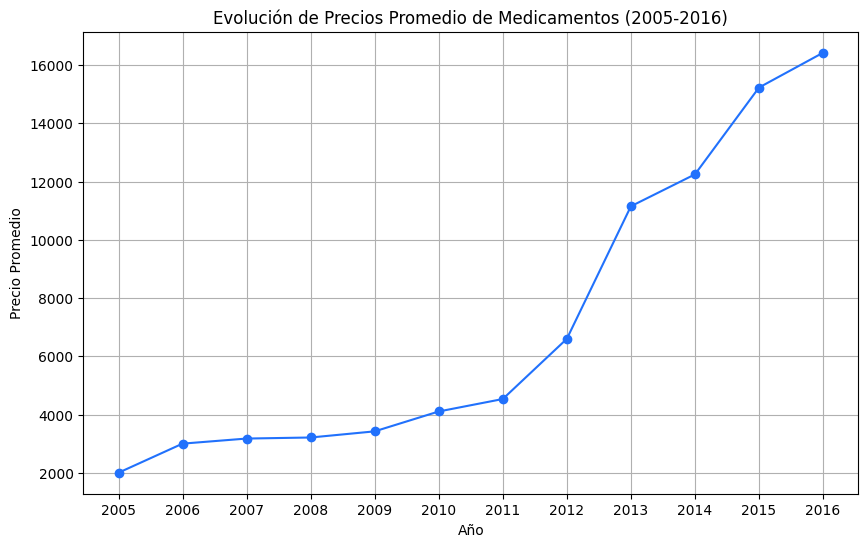

In [11]:
# Calcular los precios promedio por año
mean_prices_by_year = dataset_copy[columns_years].mean()

# Crear la gráfica de líneas
plt.figure(figsize=(10, 6))
plt.plot(columns_years, mean_prices_by_year, marker='o', linestyle='-', color='#2171fc')

# Agregar etiquetas y título
plt.xlabel('Año')
plt.ylabel('Precio Promedio')
plt.title('Evolución de Precios Promedio de Medicamentos (2005-2016)')
plt.grid(True)
plt.show()

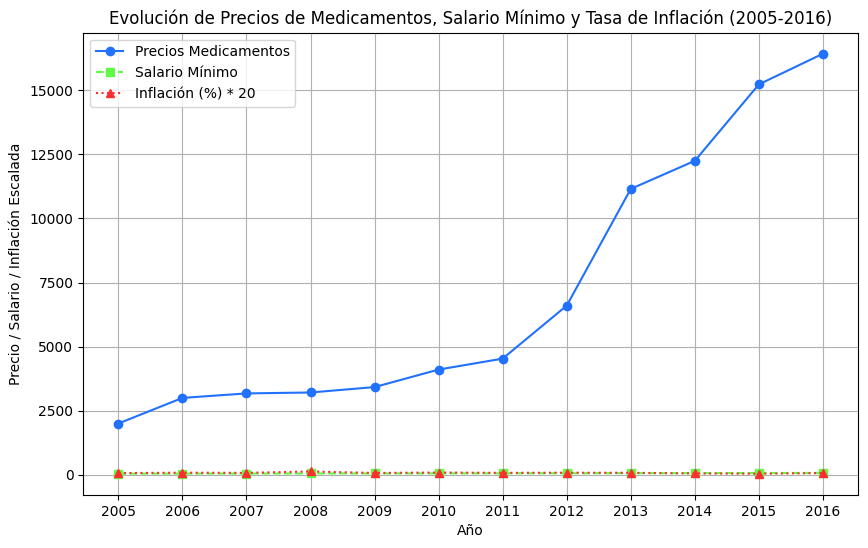

In [12]:
# Valores del salario mínimo y la inflación en México (2005-2016)
columns_years = ['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']
salario_minimo = [45.24, 48.67, 50.57, 52.59, 54.47, 56.70, 59.82, 61.38, 63.77, 66.45, 70.10, 73.04]  # Salario mínimo
inflacion = [3.3, 4.1, 3.8, 6.5, 3.6, 4.4, 3.8, 4.1, 3.9, 2.7, 2.1, 3.4]  # Incremento anual de la inflación

# Calcular los precios promedio de los medicamentos
mean_prices_by_year = dataset_copy[columns_years].mean()

# Crear la figura
plt.figure(figsize=(10, 6))

# Gráfica de línea para precios de medicamentos
plt.plot(columns_years, mean_prices_by_year, marker='o', linestyle='-', color='#2171fc', label='Precios Medicamentos')

# Gráfica de línea para salario mínimo
plt.plot(columns_years, salario_minimo, marker='s', linestyle='--', color='#61fa46', label='Salario Mínimo')

# Gráfica de línea para inflación (multiplicado para escala similar)
inflacion_scaled = [i * 20 for i in inflacion]  # Escalar la inflación para que sea visible
plt.plot(columns_years, inflacion_scaled, marker='^', linestyle=':', color='#ff2e2e', label='Inflación (%) * 20')

# Agregar etiquetas y título
plt.xlabel('Año')
plt.ylabel('Precio / Salario / Inflación Escalada')
plt.title('Evolución de Precios de Medicamentos, Salario Mínimo y Tasa de Inflación (2005-2016)')
plt.grid(True)

# Mostrar leyenda
plt.legend()

# Mostrar gráfico
plt.show()

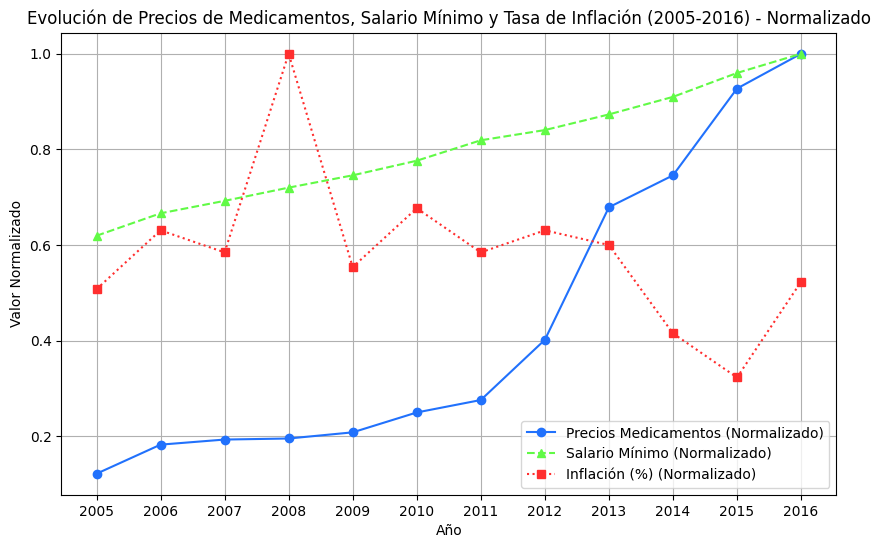

In [13]:
# Valores del salario mínimo y la inflación en México (2005-2016)
columns_years = ['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']
salario_minimo = [45.24, 48.67, 50.57, 52.59, 54.47, 56.70, 59.82, 61.38, 63.77, 66.45, 70.10, 73.04]  # Salario mínimo
inflacion = [3.3, 4.1, 3.8, 6.5, 3.6, 4.4, 3.8, 4.1, 3.9, 2.7, 2.1, 3.4]  # Incremento anual de la inflación

# Calcular los precios promedio de los medicamentos
mean_prices_by_year = dataset_copy[columns_years].mean()

# Normalizar los datos (dividir por el máximo)
mean_prices_normalized = mean_prices_by_year / mean_prices_by_year.max()
salario_minimo_normalized = [x / max(salario_minimo) for x in salario_minimo]
inflacion_normalized = [x / max(inflacion) for x in inflacion]

# Crear la figura
plt.figure(figsize=(10, 6))

# Gráfica de línea para precios de medicamentos normalizados
plt.plot(columns_years, mean_prices_normalized, marker='o', linestyle='-', color='#2171fc', label='Precios Medicamentos (Normalizado)')

# Gráfica de línea para salario mínimo normalizado
plt.plot(columns_years, salario_minimo_normalized, marker='^', linestyle='--', color='#61fa46', label='Salario Mínimo (Normalizado)')

# Gráfica de línea para inflación normalizada
plt.plot(columns_years, inflacion_normalized, marker='s', linestyle=':', color='#ff2e2e', label='Inflación (%) (Normalizado)')

# Agregar etiquetas y título
plt.xlabel('Año')
plt.ylabel('Valor Normalizado')
plt.title('Evolución de Precios de Medicamentos, Salario Mínimo y Tasa de Inflación (2005-2016) - Normalizado')
plt.grid(True)

# Mostrar leyenda
plt.legend()

# Mostrar gráfico
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_12456\3104169010.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=columns_years, y=mean_prices_by_year, palette=custom_palette_bars)


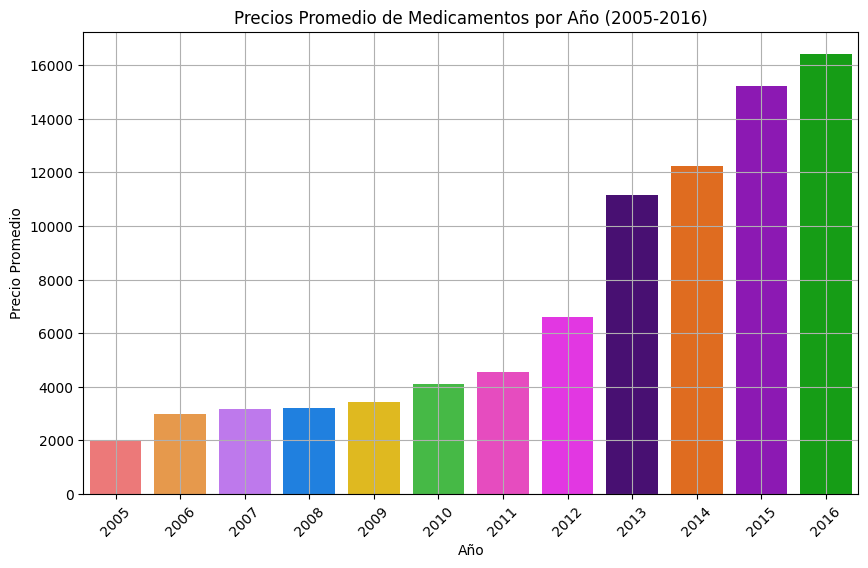

In [14]:
# Definir los colores personalizados que combinan los anteriores y tonos de rojo similares a 'Reds_d'
custom_palette_bars = ['#ff6666', '#ff9933', '#c266ff', '#0080ff', '#ffcc00', 
                       '#33cc33', '#ff33cc', '#ff1aff', '#4b0082', '#ff6600', 
                       '#9900cc', '#00b300']

# Crear gráfica de barras con la paleta personalizada
plt.figure(figsize=(10, 6))
sns.barplot(x=columns_years, y=mean_prices_by_year, palette=custom_palette_bars)

# Agregar etiquetas y título
plt.xlabel('Año')
plt.ylabel('Precio Promedio')
plt.title('Precios Promedio de Medicamentos por Año (2005-2016)')
plt.xticks(rotation=45)
plt.grid(True)

# Mostrar la gráfica
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_12456\203450416.py:8: UserWarning: The palette list has more values (15) than needed (12), which may not be intended.
  sns.boxplot(data=dataset_copy[columns_years], palette=custom_palette)


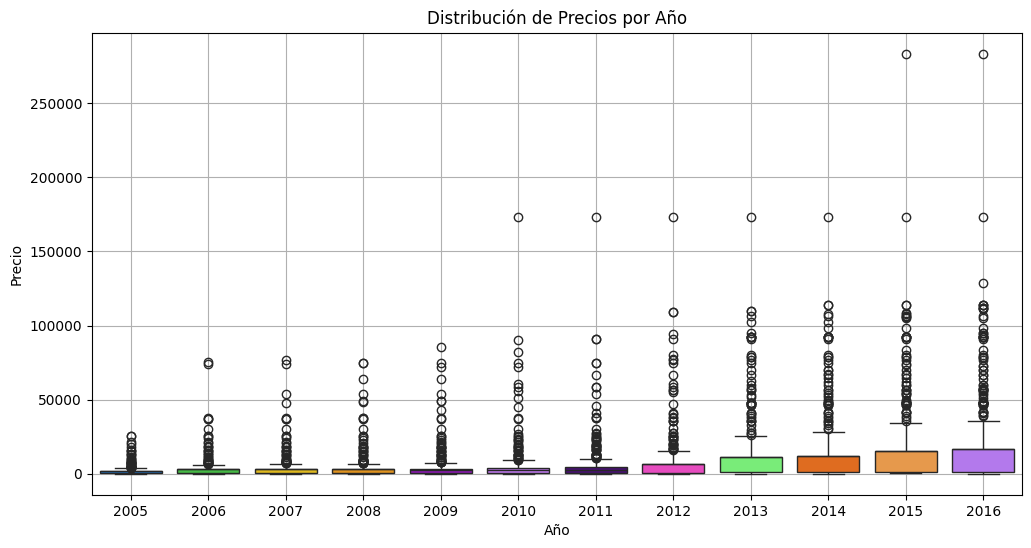

In [15]:
# Definir los colores personalizados que combinan los anteriores y los de 'Set3'
custom_palette = ['#0080ff', '#33cc33', '#ffcc00', '#ff9900', '#9900cc', 
                  '#c266ff', '#4b0082', '#ff33cc', '#66ff66', '#ff6600', 
                  '#ff9933', '#b366ff', '#3399ff', '#ffbf00', '#ff66b2']

# Crear el boxplot con la nueva paleta de colores
plt.figure(figsize=(12, 6))
sns.boxplot(data=dataset_copy[columns_years], palette=custom_palette)

# Mostrar el gráfico
plt.title('Distribución de Precios por Año')
plt.xlabel('Año')
plt.ylabel('Precio')
plt.grid(True)
plt.show()

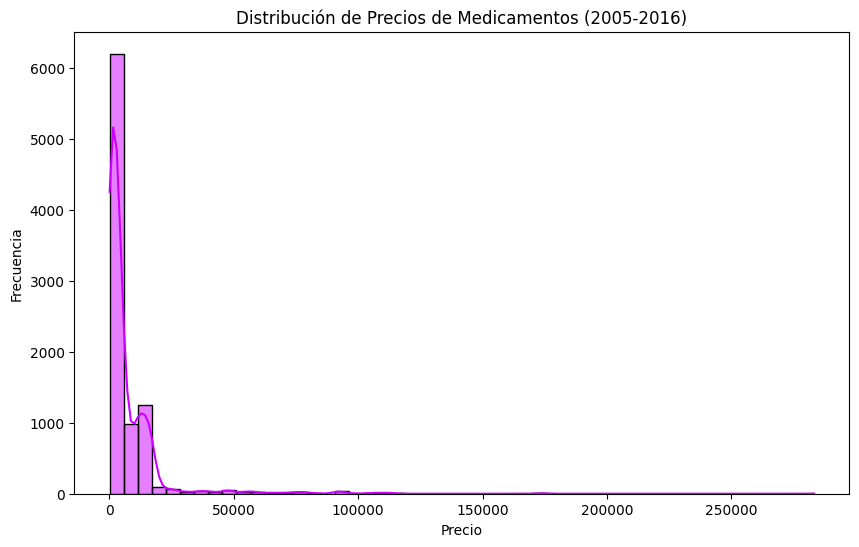

In [16]:
# Crear un histograma de precios
plt.figure(figsize=(10, 6))
sns.histplot(dataset_copy[columns_years].values.flatten(), bins=50, color='#cc00ff', kde=True)

# Agregar etiquetas y título
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Distribución de Precios de Medicamentos (2005-2016)')
plt.show()

In [17]:
# Definir las características (años) y la variable objetivo (precios promedio por año)
columns_years = ['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']
X = np.array([int(year) for year in columns_years]).reshape(-1, 1)  # Años como característica
y = dataset_copy[columns_years].mean(axis=0).values  # Promedio de precios de medicamentos

In [18]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Crear el modelo de regresión lineal
linear_model = LinearRegression()

In [20]:
# Entrenar el modelo
linear_model.fit(X_train, y_train)

LinearRegression()

In [21]:
# Hacer predicciones en los datos de prueba
y_pred = linear_model.predict(X_test)

In [22]:
# Evaluar el modelo
print(f"Coeficiente de regresión: {linear_model.coef_}")
print(f"Intercepto: {linear_model.intercept_}")
print(f"Precisión (R^2) en datos de prueba: {linear_model.score(X_test, y_test)}")

Coeficiente de regresión: [1332.39174362]
Intercepto: -2672224.1731808865
Precisión (R^2) en datos de prueba: 0.8339171764745478


In [23]:
X_log = dataset_copy[['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']]  # Nuevas variables predictoras

In [24]:
# Crear la variable objetivo binaria en base a un umbral del precio promedio
threshold_log = dataset_copy[['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']].mean().mean()  # Puedes ajustar este umbral
y_log = (dataset_copy[['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']].mean(axis=1) > threshold_log).astype(int)

In [25]:
# Dividir los datos en entrenamiento y prueba
X_log_train, X_log_test, y_log_train, y_log_test = train_test_split(X_log, y_log, test_size=0.2, random_state=42)

In [26]:
# Crear el modelo de regresión logística
logistic_model = LogisticRegression()

In [27]:
# Entrenar el modelo
logistic_model.fit(X_log_train, y_log_train)

C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
accuracy = logistic_model.score(X_log_test, y_log_test)
print(f"Precisión en datos de prueba: {accuracy}")

Precisión en datos de prueba: 0.738255033557047


In [29]:
# Realizar predicciones
y_log_pred = logistic_model.predict(X_log_test)

In [30]:
print(classification_report(y_log_test, y_log_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       115
           1       0.40      0.29      0.34        34

    accuracy                           0.74       149
   macro avg       0.60      0.58      0.59       149
weighted avg       0.71      0.74      0.72       149



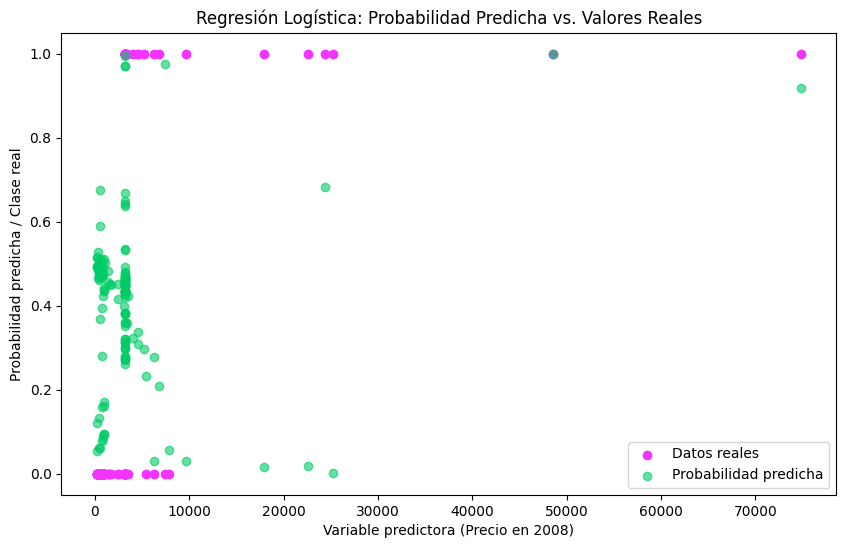

In [31]:
# Calcular las probabilidades de la clase positiva (1)
y_log_prob = logistic_model.predict_proba(X_log_test)[:, 1]

# Seleccionar una variable predictora para graficar (en este caso '2008')
X_log_test_var = X_log_test['2008']

# Crear el gráfico
plt.figure(figsize=(10, 6))

plt.scatter(X_log_test_var, y_log_test, color='#f333ff', label='Datos reales')
plt.scatter(X_log_test_var, y_log_prob, color='#00cc66', label='Probabilidad predicha', alpha=0.6)

plt.title('Regresión Logística: Probabilidad Predicha vs. Valores Reales')
plt.xlabel('Variable predictora (Precio en 2008)')
plt.ylabel('Probabilidad predicha / Clase real')
plt.legend()
plt.show()

In [32]:
# Definir las variables predictoras y la variable de salida (clase binaria basada en '2016')
X_class = dataset_copy[['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']]
y_class = (dataset_copy['2016'] > dataset_copy['2016'].mean()).astype(int)  # Clase binaria (1 si es mayor que el promedio, 0 si no)

In [33]:
# Dividir los datos en entrenamiento y prueba
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

In [34]:
# Entrenar un modelo de árbol de decisión
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_class, y_train_class)

DecisionTreeClassifier()

In [35]:
# Entrenar un modelo de bosque aleatorio
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_class, y_train_class)

RandomForestClassifier()

In [36]:
# Predicción en los datos de prueba
y_pred_dt = dt_classifier.predict(X_test_class)
y_pred_rf = rf_classifier.predict(X_test_class)

In [37]:
# Entrenar un modelo de bosque aleatorio
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_class, y_train_class)

RandomForestClassifier()

In [38]:
# Mostrar resultados de ambos modelos
print("Decision Tree Classifier:")
print(classification_report(y_test_class, y_pred_dt))
print("Random Forest Classifier:")
print(classification_report(y_test_class, y_pred_rf))

# Exactitud de ambos modelos
print(f"Exactitud de Decision Tree: {accuracy_score(y_test_class, y_pred_dt):.2f}")
print(f"Exactitud de Random Forest: {accuracy_score(y_test_class, y_pred_rf):.2f}")

Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       128
           1       1.00      0.86      0.92        21

    accuracy                           0.98       149
   macro avg       0.99      0.93      0.96       149
weighted avg       0.98      0.98      0.98       149

Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       128
           1       1.00      0.86      0.92        21

    accuracy                           0.98       149
   macro avg       0.99      0.93      0.96       149
weighted avg       0.98      0.98      0.98       149

Exactitud de Decision Tree: 0.98
Exactitud de Random Forest: 0.98


In [39]:
# Definir las variables predictoras y la variable de salida (precio en '2016')
X_reg = dataset_copy[['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']]
y_reg = dataset_copy['2016']

In [40]:
# Dividir los datos en entrenamiento y prueba
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

In [41]:
# Entrenar un modelo de árbol de decisión para regresión
dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(X_train_reg, y_train_reg)

DecisionTreeRegressor()

In [42]:
# Predicción en los datos de prueba
y_pred_reg = dt_regressor.predict(X_test_reg)

# Mostrar resultados del modelo
print(f"Error cuadrático medio: {mean_squared_error(y_test_reg, y_pred_reg):.2f}")
print(f"Coeficiente de determinación (R^2): {r2_score(y_test_reg, y_pred_reg):.2f}")

Error cuadrático medio: 130061965.36
Coeficiente de determinación (R^2): 0.76


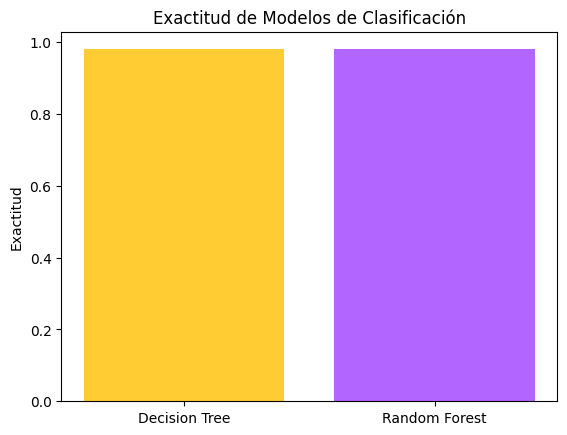

In [43]:
# Gráfico de la exactitud de los modelos de clasificación
models = ['Decision Tree', 'Random Forest']
accuracy = [accuracy_score(y_test_class, y_pred_dt), accuracy_score(y_test_class, y_pred_rf)]

plt.bar(models, accuracy, color=['#ffcc33', '#b366ff'])
plt.title('Exactitud de Modelos de Clasificación')
plt.ylabel('Exactitud')
plt.show()

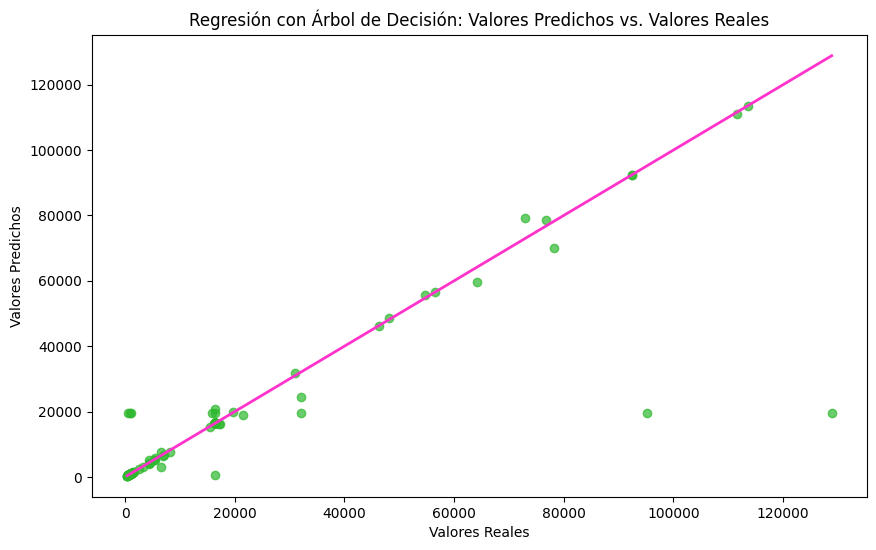

In [44]:
plt.figure(figsize=(10, 6))

plt.scatter(y_test_reg, y_pred_reg, color='#2eb82e', alpha=0.7)
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], color='#ff33cc', lw=2)
plt.title('Regresión con Árbol de Decisión: Valores Predichos vs. Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.show()

In [45]:
#Entrenar un modelo de bosque aleatorio para regresión
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train_reg, y_train_reg)

RandomForestRegressor()

In [46]:
# Predicción en los datos de prueba
y_pred_rf_reg = rf_regressor.predict(X_test_reg)

# Mostrar resultados del modelo
print(f"Error cuadrático medio (Random Forest): {mean_squared_error(y_test_reg, y_pred_rf_reg):.2f}")
print(f"Coeficiente de determinación (R^2) (Random Forest): {r2_score(y_test_reg, y_pred_rf_reg):.2f}")

Error cuadrático medio (Random Forest): 129382562.49
Coeficiente de determinación (R^2) (Random Forest): 0.76


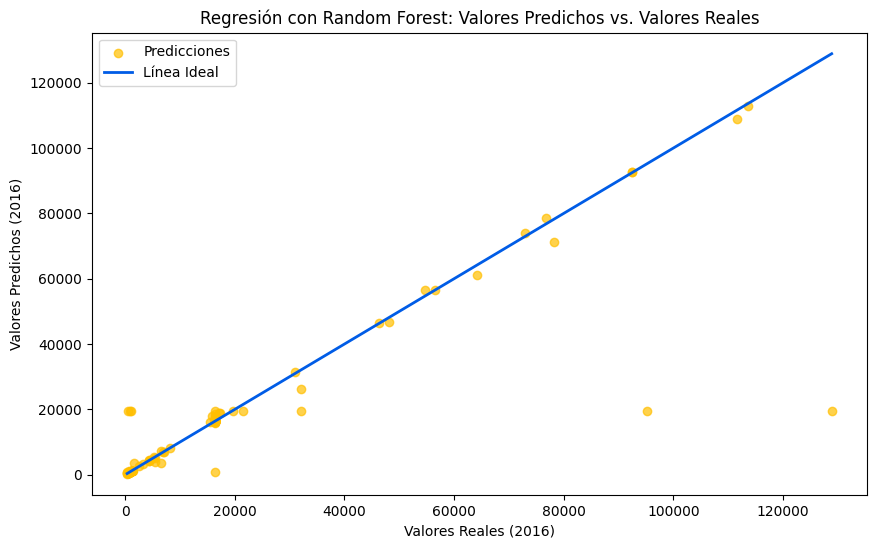

In [47]:
# Crear una figura para el gráfico
plt.figure(figsize=(10, 6))

# Gráfico de dispersión de los valores reales vs. los predichos
plt.scatter(y_test_reg, y_pred_rf_reg, color='#ffbf00', alpha=0.7, label='Predicciones')
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], color='#005ce6', lw=2, label='Línea Ideal')

# Etiquetas y título del gráfico
plt.title('Regresión con Random Forest: Valores Predichos vs. Valores Reales')
plt.xlabel('Valores Reales (2016)')
plt.ylabel('Valores Predichos (2016)')
plt.legend()
plt.show()